#Import Library and data

In [1]:
#import Library
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

#Random Forest Model
from sklearn.ensemble import RandomForestClassifier

In [2]:
#import data from github

#List_Company_train ชุดข้อมูลไว้สำหรับ train
url_train = 'https://raw.githubusercontent.com/NutnichaFah/DSI314-Project-Group8/main/List_Company_train.csv'

#List_company_test ชุดข้อมูลไว้สำหรับ test
url_test = 'https://raw.githubusercontent.com/NutnichaFah/DSI314-Project-Group8/main/List_Company_test.csv'

data = pd.read_csv(url_train)
data_test = pd.read_csv(url_test)

#1. Exploratory Data Analysis (EDA)

In [3]:
data

,Company_Name,incorporation_date,Period,income ($M),num_employee,country_code,web_globalrank,has_domain,has_instargram,has_facebook,Status
0,BEHEYT,1968.0,54.0,NaN,NaN,56,NaN,no,no,no,inactive
1,BIK BIJOUX IMPENS B.V.B.A.,NaN,NaN,NaN,NaN,56,NaN,no,no,no,inactive
2,BOSCHMANS N.V.,1865.0,157.0,NaN,NaN,56,NaN,no,no,no,inactive
3,"E. VAN RANST, ZONEN B.V.B.A.",1968.0,54.0,NaN,NaN,56,NaN,yes,no,no,active
4,WOUTERS & HENDRIX N.V.,NaN,NaN,NaN,NaN,56,NaN,no,no,no,inactive
...,...,...,...,...,...,...,...,...,...,...,...
626,JENNY PERL FOR JMP,NaN,NaN,NaN,NaN,840,NaN,no,no,no,active
627,JEWELERY UNLIMITED INC. DBA INDIA GEMS,NaN,NaN,NaN,NaN,840,14263859.0,yes,no,yes,active
628,JEWELEX NEW YORK LTD.,NaN,NaN,NaN,NaN,840,14614085.0,yes,no,no,active
629,JEWELMARK INC.,NaN,NaN,NaN,NaN,840,NaN,yes,no,no,active


In [4]:
# ดูภาพรวมของข้อมูล
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631 entries, 0 to 630
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company_Name        631 non-null    object 
 1   incorporation_date  373 non-null    float64
 2   Period              370 non-null    float64
 3   income ($M)         109 non-null    object 
 4   num_employee        158 non-null    object 
 5   country_code        631 non-null    int64  
 6   web_globalrank      182 non-null    float64
 7   has_domain          629 non-null    object 
 8   has_instargram      630 non-null    object 
 9   has_facebook        630 non-null    object 
 10  Status              631 non-null    object 
dtypes: float64(3), int64(1), object(7)
memory usage: 54.4+ KB


In [5]:
#ตรวจสอบจำนวน missing value
null_cols_values = data.isnull().sum()
null_datapoints = null_cols_values[null_cols_values>0].sum()

print(null_cols_values)
print(f"sum of Missing Value = {null_datapoints}")

Company_Name            0
incorporation_date    258
Period                261
income ($M)           522
num_employee          473
country_code            0
web_globalrank        449
has_domain              2
has_instargram          1
has_facebook            1
Status                  0
dtype: int64
sum of Missing Value = 1967


In [6]:
# ตรวจสอบค่า Unique
data.nunique()

Company_Name          630
incorporation_date     96
Period                 96
income ($M)            20
num_employee            9
country_code           31
web_globalrank        182
has_domain              2
has_instargram          2
has_facebook            2
Status                  2
dtype: int64

In [7]:
#สร้างฟังก์ชัน เพื่อสร้างกราฟ
def val_count_BarPlot(data=None, count_cols=None):
  data_count = data[count_cols].value_counts()
  fig, ax = plt.subplots(figsize=(10, 8))
  pbar = ax.bar(data_count.index.astype(str),data_count.values)
  ax.set_title(f"{count_cols} values count")

def val_count_BarhPlot(data=None, count_cols=None):
  data_count = data[count_cols].value_counts()
  fig, ax = plt.subplots(figsize=(10, 8))
  pbar = ax.barh(data_count.index.astype(str),data_count.values)
  ax.set_title(f"{count_cols} values count")

  plt.show()

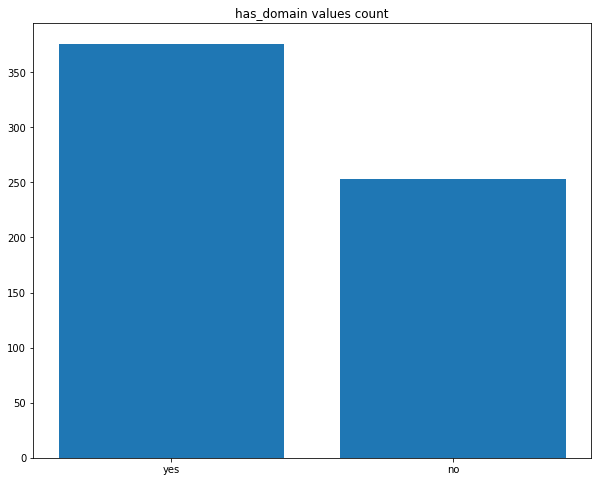

In [8]:
#กราฟแท่งของคอลัมน์ has_domain
val_count_BarPlot(data=data, count_cols='has_domain')

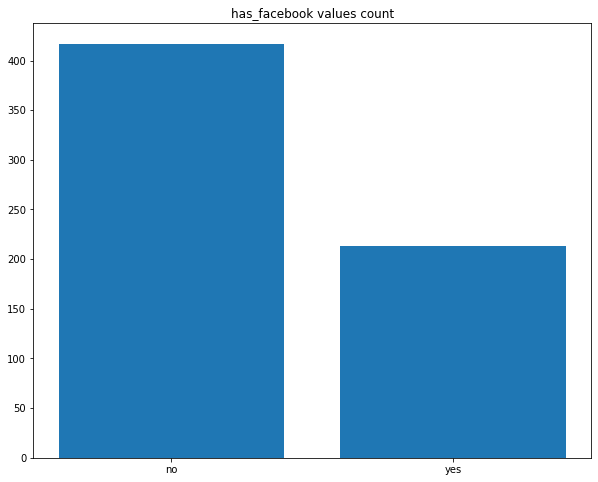

In [9]:
#กราฟแท่งของคอลัมน์ has_facebook
val_count_BarPlot(data=data, count_cols='has_facebook')

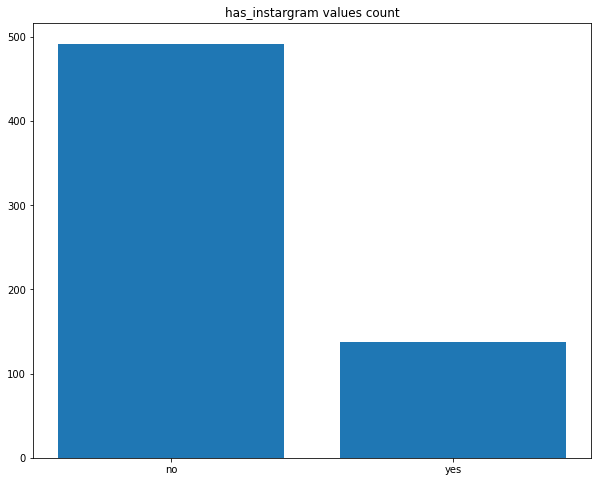

In [10]:
#กราฟแท่งของคอลัมน์ has_instargram
val_count_BarPlot(data=data, count_cols='has_instargram')

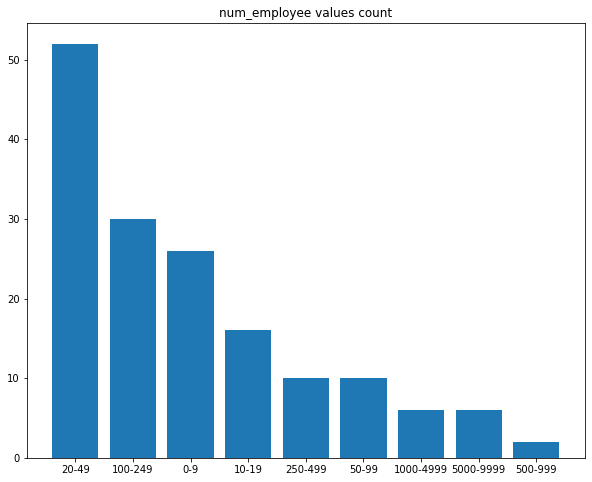

In [11]:
#กราฟแท่งของคอลัมน์ num_employee
val_count_BarPlot(data=data, count_cols='num_employee')

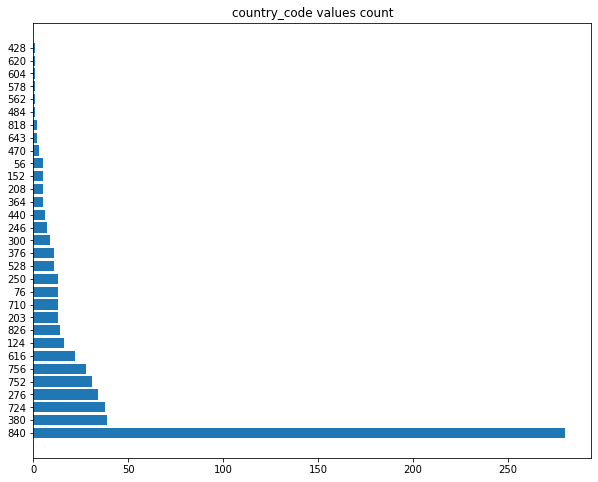

In [12]:
#กราฟแท่งของคอลัมน์ country_code
val_count_BarhPlot(data=data, count_cols='country_code')

-------------------------

#2. Feature Engineering

In [13]:
#เติมค่าว่างในคอลัมน์ has_domain,has_instargram,has_facebook
data['has_domain'] = data['has_domain'].fillna('no')
data['has_instargram'] = data['has_instargram'].fillna('no') 
data['has_facebook'] = data['has_facebook'].fillna('no') 

In [14]:
#เติมค่าว่างในคอลัมน์ num_employee ด้วยค่า mode
data['num_employee'] = data['num_employee'].fillna(data['num_employee'].mode()[0])

In [15]:
#เติมค่าว่างในคอลัมน์ web_globalrank ด้วยค่า 0
data['web_globalrank'] = data['web_globalrank'].fillna(0)

In [16]:
#ในข้อมูลมีประเทศที่ไม่ต้องการ คือ ประเทศที่มีรหัส 364,376

#เรียกดูแถวที่มีประเทศที่มีรหัส 364
data[data['country_code'] == 364]
#ดรอปแถวที่มีประเทศที่มีรหัส 364
data.drop(data.index[[122,123,124,125,126]], inplace=True)
#ดรอปแถวที่มีประเทศที่มีรหัส 376
data = data.drop(labels=[127,128,129,130,131,132,133,134,135,136,137], axis=0)

#ดรอปคอลัมน์ที่ไม่ได้ใช้
data.drop(columns = ['income ($M)','Company_Name','num_employee','incorporation_date','Period'],inplace = True)

data

,country_code,web_globalrank,has_domain,has_instargram,has_facebook,Status
0,56,0.0,no,no,no,inactive
1,56,0.0,no,no,no,inactive
2,56,0.0,no,no,no,inactive
3,56,0.0,yes,no,no,active
4,56,0.0,no,no,no,inactive
...,...,...,...,...,...,...
626,840,0.0,no,no,no,active
627,840,14263859.0,yes,no,yes,active
628,840,14614085.0,yes,no,no,active
629,840,0.0,yes,no,no,active


In [17]:
#Label encoding คอลัมน์ has_domain, has_instargram, has_facebook ของชุดข้อมูล data
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

data['has_domain']= label_encoder.fit_transform(data['has_domain'])
data['has_instargram']= label_encoder.fit_transform(data['has_instargram'])
data['has_facebook']= label_encoder.fit_transform(data['has_facebook'])
data['Status']= label_encoder.fit_transform(data['Status'])

data


,country_code,web_globalrank,has_domain,has_instargram,has_facebook,Status
0,56,0.0,0,0,0,1
1,56,0.0,0,0,0,1
2,56,0.0,0,0,0,1
3,56,0.0,1,0,0,0
4,56,0.0,0,0,0,1
...,...,...,...,...,...,...
626,840,0.0,0,0,0,0
627,840,14263859.0,1,0,1,0
628,840,14614085.0,1,0,0,0
629,840,0.0,1,0,0,0


ทำ Feature Engineering กับชุดข้อมูล data_test

In [18]:
data_test

,Company_Name,country_code,web_globalrank,has_domain,has_instargram,has_facebook
0,Tiffany & Co,840,12752.0,yes,yes,yes
1,Schmuck Shopping,276,3168213.0,yes,no,yes
2,Sif Jakobs Jewellery ApS,208,2423908.0,yes,yes,yes
3,DROSTES JEWELRY SHOPPE INC,840,NaN,yes,yes,yes
4,"PATRICK ADAIR DESIGNS, LLC",840,212294.0,yes,yes,yes
...,...,...,...,...,...,...
97,ZOLOTAS JEWELERS S.A.,300,772696.0,yes,yes,yes
98,BIJOUTERIE P.C.,300,8057613.0,yes,no,no
99,"SERAFEIM, EVANGELOS ""SERAFIM JEWELLERY"" LTD",300,2839822.0,yes,yes,yes
100,"STAVROPOULOS, DIMITRIOS, & CO E.E.",300,NaN,yes,yes,yes


In [19]:
#Label encoding data_test
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

data_test['has_domain']= label_encoder.fit_transform(data_test['has_domain'])
data_test['has_instargram']= label_encoder.fit_transform(data_test['has_instargram'])
data_test['has_facebook']= label_encoder.fit_transform(data_test['has_facebook'])

In [20]:
data_test['web_globalrank'] = data_test['web_globalrank'].fillna(0)

In [21]:
data_test.drop(columns = ['Company_Name'],inplace = True)

In [22]:
data_test

,country_code,web_globalrank,has_domain,has_instargram,has_facebook
0,840,12752.0,1,1,1
1,276,3168213.0,1,0,1
2,208,2423908.0,1,1,1
3,840,0.0,1,1,1
4,840,212294.0,1,1,1
...,...,...,...,...,...
97,300,772696.0,1,1,1
98,300,8057613.0,1,0,0
99,300,2839822.0,1,1,1
100,300,0.0,1,1,1


#3. Data Preparation

In [23]:
# import library สำหรับการทำ model
from sklearn.model_selection import train_test_split

X = data.drop(columns = ['Status'], axis=1)
y = data['Status']

In [24]:
# แบ่งชุดข้อมูลเป็น train และ test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

#4. Model

In [37]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rf_CLF = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=120)

# เทรนโมเดล
rf_CLF.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, random_state=120)

In [38]:
# ทำนายผล
y_predict = rf_CLF.predict(x_test)
y_predict

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0])

In [39]:
# สร้างฟังก์ชันสำหรับการประเมินโมเดล
from sklearn import metrics

def modelEvaluation(Y_test=None, predictions=None):
  accuracy = metrics.accuracy_score(Y_test, predictions)
  precision = metrics.precision_score(Y_test, predictions)
  recall = metrics.recall_score(Y_test, predictions)
  f1 = metrics.f1_score(Y_test, predictions)

  print(f"Accuracy = {np.round(accuracy, 4)}")
  print(f"Precision = {np.round(precision, 4)}")
  print(f"recall = {np.round(recall, 4)}")
  print(f"F1 = {np.round(f1, 4)}")

In [40]:
modelEvaluation(Y_test=y_test, predictions=y_predict)

Accuracy = 0.8919
Precision = 0.9184
recall = 0.7377
F1 = 0.8182


นำโมเดลที่เราได้มาทำนายผล โดยใช้ชุดข้อมูล data_test

In [42]:
satu_predicts = rf_CLF.predict(data_test)
satu_predicts

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])